# Imports and constants

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import math

%matplotlib inline

In [2]:
CHEKPOINTS_PATH = '../checkpoints/'
ASSESTS_PATH = 'assets/'
SUCCESS_RATE = 'success_rate'
AVG_ROUND = 'avg_round'
AVG_REWARD = 'avg_reward'

# Load the performance metrics

In [91]:
PERFORMANCE_FILES_BELIEF_DRQN = []
PERFORMANCE_FILES_BELIEF_DRQN1 = []

# for run in range(3):
PERFORMANCE_FILES_BELIEF_DRQN.append(os.path.join('belief_drqn', f'performance_{2}_train.json'))
PERFORMANCE_FILES_BELIEF_DRQN1.append(os.path.join('belief_drqn1', f'performance_{0}_train.json'))
    
SAVE_FIG = False

metrics_belief_drqn_df = []
metrics_belief_drqn1_df = []

for index in range(len(PERFORMANCE_FILES_BELIEF_DRQN)):
    metrics_belief_drqn_df.append(pd.read_json(os.path.join(CHEKPOINTS_PATH, PERFORMANCE_FILES_BELIEF_DRQN[index]))['train'].sort_index())
    metrics_belief_drqn1_df.append(pd.read_json(os.path.join(CHEKPOINTS_PATH, PERFORMANCE_FILES_BELIEF_DRQN1[index]))['train'].sort_index())

In [92]:
def merge_runs(df, metric):
    merged = pd.DataFrame(index=range(len(df)), columns=[int(x) for x in df[0][metric].keys()])
    for run in range(len(df)):
        merged.loc[run] = list(df[run][metric].values())
    return merged[:10000]

In [93]:
success_belief_drqn_df = merge_runs(metrics_belief_drqn_df, SUCCESS_RATE)
reward_belief_drqn_df = merge_runs(metrics_belief_drqn_df, AVG_REWARD)
round_belief_drqn_df = merge_runs(metrics_belief_drqn_df, AVG_ROUND)

In [94]:
success_belief_drqn1_df = merge_runs(metrics_belief_drqn1_df, SUCCESS_RATE)
reward_belief_drqn1_df = merge_runs(metrics_belief_drqn1_df, AVG_REWARD)
round_belief_drqn1_df = merge_runs(metrics_belief_drqn1_df, AVG_ROUND)

In [95]:
mean_success_belief_drqn = success_belief_drqn_df.mean().rolling(5).mean()
std_success_belief_drqn = success_belief_drqn_df.std().rolling(5).mean()

mean_reward_belief_drqn = reward_belief_drqn_df.mean().rolling(5).mean()
std_reward_belief_drqn = reward_belief_drqn_df.std().rolling(5).mean()

mean_round_belief_drqn = round_belief_drqn_df.mean().rolling(5).mean()
std_round_belief_drqn = round_belief_drqn_df.std().rolling(5).mean()

In [96]:
mean_success_belief_drqn1 = success_belief_drqn1_df.mean().rolling(5).mean()
std_success_belief_drqn1 = success_belief_drqn1_df.std().rolling(5).mean()

mean_reward_belief_drqn1 = reward_belief_drqn1_df.mean().rolling(5).mean()
std_reward_belief_drqn1 = reward_belief_drqn1_df.std().rolling(5).mean()

mean_round_belief_drqn1 = round_belief_drqn1_df.mean().rolling(5).mean()
std_round_belief_drqn1 = round_belief_drqn1_df.std().rolling(5).mean()

In [97]:
confidence = 1.96

In [98]:
## Jump start
mean_success_belief_drqn.dropna().iat[0] - mean_success_belief_drqn1.dropna().iat[0]

0.014000000000000002

In [99]:
threshold = max(mean_success_belief_drqn.dropna()) * 0.7
threshold

0.6117999999999997

In [100]:
## Time to threshold
mean_success_belief_drqn.dropna()[mean_success_belief_drqn > threshold].index[0] - mean_success_belief_drqn.dropna()[mean_success_belief_drqn > threshold].index[0]

0

In [101]:
max(mean_success_belief_drqn.dropna()) - max(mean_success_belief_drqn1.dropna())

0.0779999999999994

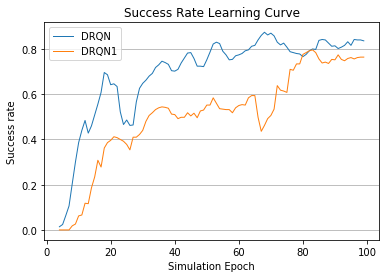

In [102]:
low_success_belief_drqn = mean_success_belief_drqn - confidence * (std_success_belief_drqn / math.sqrt(3))
high_success_belief_drqn = mean_success_belief_drqn + confidence * (std_success_belief_drqn / math.sqrt(3))

low_success_belief_drqn1 = mean_success_belief_drqn1 - confidence * (std_success_belief_drqn1 / math.sqrt(3))
high_success_belief_drqn1 = mean_success_belief_drqn1 + confidence * (std_success_belief_drqn1 / math.sqrt(3))

plt.xlabel('Simulation Epoch')
plt.ylabel('Success rate')
plt.title('Success Rate Learning Curve')
plt.grid(b=True, axis='y')

plt.plot(range(100), mean_success_belief_drqn[:100], lw=1, label='DRQN')
plt.fill_between(range(100), low_success_belief_drqn[:100], high_success_belief_drqn[:100], alpha=0.4)

plt.plot(range(100), mean_success_belief_drqn1[:100], lw=1, label='DRQN1')
plt.fill_between(range(100), low_success_belief_drqn1[:100], high_success_belief_drqn1[:100], alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'success_rate.png'))

plt.show()

IndexError: tuple index out of range

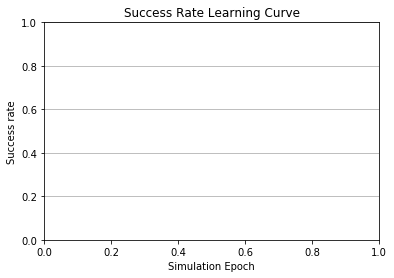

In [97]:
low_success_belief_drqn = mean_success_belief_drqn - confidence * (std_success_belief_drqn / math.sqrt(20))
high_success_belief_drqn = mean_success_belief_drqn + confidence * (std_success_belief_drqn / math.sqrt(20))

low_success_belief_drqn1 = mean_success_belief_drqn1 - confidence * (std_success_belief_drqn1 / math.sqrt(20))
high_success_belief_drqn1 = mean_success_belief_drqn1 + confidence * (std_success_belief_drqn1 / math.sqrt(20))

plt.xlabel('Simulation Epoch')
plt.ylabel('Success rate')
plt.title('Success Rate Learning Curve')
plt.grid(b=True, axis='y')

plt.plot(mean_success_belief_drqn.index[:100] / 100, mean_success_belief_drqn.values[:100], lw=1, label='DRQN')
plt.fill_between(mean_success_belief_drqn.index[:100] / 100, low_success_belief_drqn[:100], high_success_belief_drqn[:100], alpha=0.4)

plt.plot(mean_success_belief_drqn1.index[:100] / 100, mean_success_belief_drqn1.values[:100], lw=1, label='DRQN1')
plt.fill_between(mean_success_belief_drqn1.index[:100] / 100, low_success_belief_drqn1[:100], high_success_belief_drqn1[:100], alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'success_rate.png'))

plt.show()

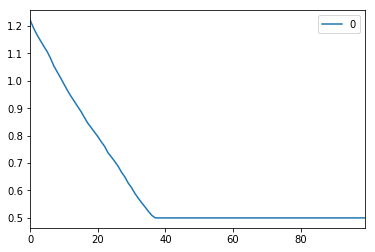

In [64]:
with open('./checkpoints/performance_softmax_run0.json_tau', 'r') as f:
    x=f.read()
x = x.split('\n')[:-1]
pd.DataFrame(data=x, dtype=float).plot()

In [40]:
with open('./checkpoints/performance_agt_boltz_3_run0.json_sigma', 'r') as f:
    x=f.read()
x = x.split('\n')[:-1]
pd.DataFrame(data=x, dtype=float).plot()

FileNotFoundError: [Errno 2] No such file or directory: './checkpoints/performance_agt_boltz_3_run0.json_sigma'

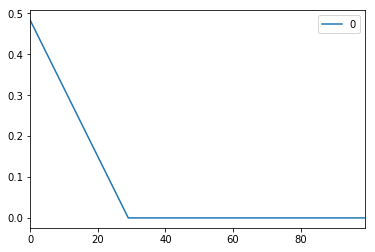

In [241]:
with open('./checkpoints/performance_agt_boltz_2_run1.json_sigma', 'r') as f:
    x=f.read()
x = x.split('\n')[:-1]
pd.DataFrame(data=x, dtype=float).plot()

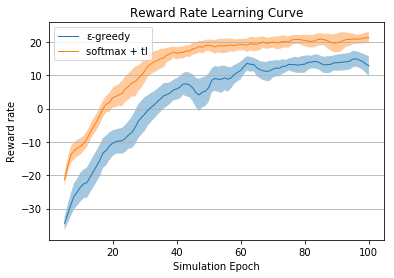

In [75]:
low_reward_const = mean_reward_const - confidence * (std_reward_const / math.sqrt(20))
high_reward_const = mean_reward_const + confidence * (std_reward_const / math.sqrt(20))

low_reward_boltz = mean_reward_boltz - confidence * (std_reward_boltz / math.sqrt(20))
high_reward_boltz = mean_reward_boltz + confidence * (std_reward_boltz / math.sqrt(20))

plt.xlabel('Simulation Epoch')
plt.ylabel('Reward rate')
plt.title('Reward Rate Learning Curve')
plt.grid(b=True, axis='y')

plt.plot(mean_reward_const.index / 100, mean_reward_const, lw=1, label='\u03B5-greedy')
plt.fill_between(mean_reward_const.index / 100, low_reward_const, high_reward_const, alpha=0.4)

plt.plot(mean_reward_boltz.index / 100, mean_reward_boltz, lw=1, label='softmax + tl')
plt.fill_between(mean_reward_boltz.index / 100, low_reward_boltz, high_reward_boltz, alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'avg_reward.png'))

plt.show()

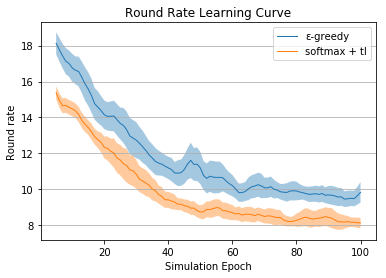

In [76]:
low_round_const = mean_round_const - confidence * (std_round_const / math.sqrt(20))
high_round_const = mean_round_const + confidence * (std_round_const / math.sqrt(20))

low_round_boltz = mean_round_boltz - confidence * (std_round_boltz / math.sqrt(20))
high_round_boltz = mean_round_boltz + confidence * (std_round_boltz / math.sqrt(20))

plt.xlabel('Simulation Epoch')
plt.ylabel('Round rate')
plt.title('Round Rate Learning Curve')
plt.grid(b=True, axis='y')

plt.plot(mean_round_const.index / 100, mean_round_const, lw=1, label='\u03B5-greedy')
plt.fill_between(mean_round_const.index / 100, low_round_const, high_round_const, alpha=0.4)

plt.plot(mean_round_boltz.index / 100, mean_round_boltz, lw=1, label='softmax + tl')
plt.fill_between(mean_round_boltz.index / 100, low_round_boltz, high_round_boltz, alpha=0.4)

plt.legend()

if SAVE_FIG:
    plt.savefig(os.path.join(ASSESTS_PATH, 'avg_round.png'))

plt.show()